### 모델 평가와 성능 향상
+  교차검증

    > 안정적인 일반화 성능 측정 방법. 추가로 score 메서드의 정확도와 R^2 값 이외에 분류와 회귀 성능을 측정하는 방법들

+ 그리드 서치
    > 가장 좋은 일반화 성능을 얻기 위한 매개변수 조정 방법

In [3]:
import mglearn
import matplotlib.pyplot as plt
import numpy as np, pandas as pd
import sklearn

#### 교차 검증(Cross validation)
+ 데이터를 여러 번 반복해서 나누고 여러 모델을 학습.

    > K-겹 교차 검증(k-fold cross validation).
    
        > k = 보통 5 or 10. 데이터를 k개의 폴드로 나누어 폴드 k개의 모델을 생성하고, 각 모델에서 서로다른 폴드를 val set으로 사용하여 검증한다.

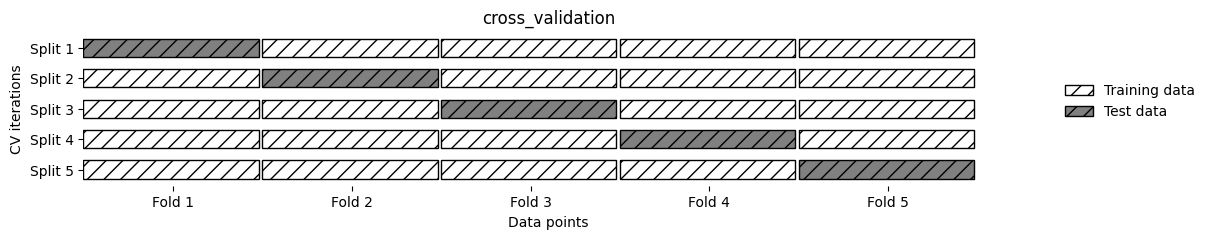

In [3]:
mglearn.plots.plot_cross_validation()

In [21]:
# 교차검증  - cross_val_score
    # 테스트 셋에 각 샘플이 정확히 한 번씩 들어간다.
from sklearn.model_selection import cross_val_score
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
iris = load_iris()
logreg = LogisticRegression(max_iter=1000)

scores = cross_val_score(logreg, iris.data, iris.target,cv=10)
                        #  estimator,  X,        y,      fold
    # fold == batch size?
print('cross_val_score: \n',scores)
print('\ncross_val_mean_score:',scores.mean())

# cross_validate
from sklearn.model_selection import cross_validate
res = cross_validate(logreg,iris.data,iris.target,cv=10,return_train_score=True, return_estimator=True)
res
    # 분할마다 훈련과 테스트에 걸린 시간, score를 dic 으로 반환.

res_df = pd.DataFrame(res)
res_df  

# 교차 검증은 검증방법이지 모델을 반환하는 것이 아니다.
    # 차선책으로 cross_val_predict 를 통해 각 폴드가 테스트 세트일 때 예측된 값을 반환할 수 있다.
    # 

cross_val_score: 
 [1.         0.93333333 1.         1.         0.93333333 0.93333333
 0.93333333 1.         1.         1.        ]

cross_val_mean_score: 0.9733333333333334


,fit_time,score_time,estimator,test_score,train_score
0,0.009002,0.000,LogisticRegression(max_iter=1000),1.000000,0.970370
1,0.008002,0.000,LogisticRegression(max_iter=1000),0.933333,0.977778
2,0.009002,0.000,LogisticRegression(max_iter=1000),1.000000,0.970370
3,0.009003,0.000,LogisticRegression(max_iter=1000),1.000000,0.970370
4,0.009002,0.000,LogisticRegression(max_iter=1000),0.933333,0.977778
5,0.010003,0.000,LogisticRegression(max_iter=1000),0.933333,0.977778
6,0.009002,0.000,LogisticRegression(max_iter=1000),0.933333,0.985185
7,0.008002,0.000,LogisticRegression(max_iter=1000),1.000000,0.970370
8,0.008002,0.000,LogisticRegression(max_iter=1000),1.000000,0.970370
9,0.007002,0.001,LogisticRegression(max_iter=1000),1.000000,0.977778


cross_val_score: [1.         0.83333333 1.         1.         0.93333333]


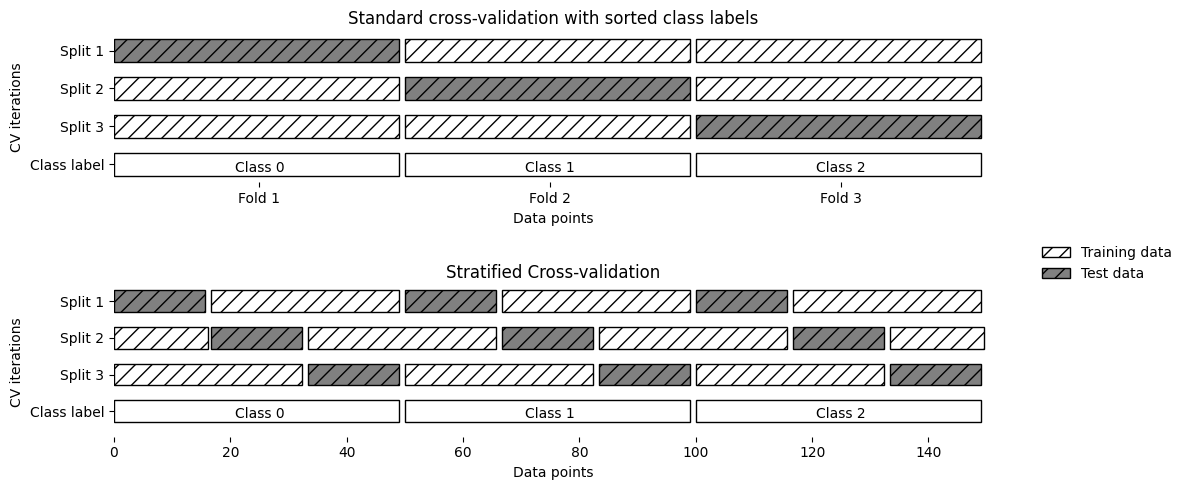

In [24]:
# 계층별 k-겹 교차 검증 - stratified k-fold cross validation
# 샘플이 레이블 순서대로 정렬되어 있어서 폴드로 나눴을때 각 폴드가 하나의 레이블만을 포함하면 score는 0이 된다.
# 이를 방지하기 위해 다음과 같은 방식을 사용
mglearn.plots.plot_stratified_cross_validation()

# 교차검증 상세 옵션
    # cross_val_score 는 분류에는 StratifiedKFOLD, 회귀에는 KFOLD를 사용한다.
    # KFOLD의 매개변수 shuffle을 True(default:False)시 무작위로 섞은 후 폴드를 나눈다.
    # 하지만 cross_val_score에서 이를 제어할 수는 없다.
    # 따라서 따로  KFOLD 객체를 만들어 cv매개면수로 전달해야한다.

from sklearn.model_selection import KFold
kfold = KFold(n_splits=5,shuffle=True,random_state=0)
print('cross_val_score:',cross_val_score(logreg,iris.data,iris.target, cv=kfold))


In [26]:
# LOOCV
    #  폴드 하나에 샘플하나만 들어있는 k-겹 교차 검증.
    # > 각 반복에서 하나의 데이터 포인트를 선택해 테스트 셋으로 사용
from sklearn.model_selection import LeaveOneOut
loo = LeaveOneOut()
scores = cross_val_score(logreg,iris.data, iris.target, cv= loo)
scores.mean()

0.9666666666666667

array([0.96666667, 1.        , 1.        , 0.93333333, 1.        ])

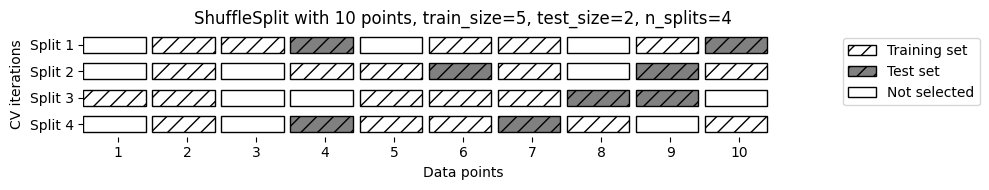

In [29]:
# 임의 분할 교차 검증(shuffle_split cross_validation)
    # train_size 만큼의 포인트로 훈련 세트를, test_size 만큼의 포인트로 테스트 세트를 만들도록 분할.
    # 분할은 n_splits 횟수만큼 반복된다.

mglearn.plots.plot_shuffle_split()

from sklearn.model_selection import ShuffleSplit
shuff = ShuffleSplit(train_size=.7,test_size=.2,n_splits=5)
scores = cross_val_score(logreg,iris.data, iris.target, cv=shuff)
scores

    # 반복 횟수를 훈련 세트나 테스트 세트의 크기와 독립적으로 조절시 유용
    # 훈련 셋과 테스트 셋의 합이 전체가 되지않게 하여 일부만 사용가능. > 빅데이터에 유용
    # 추가로 StratifiedShuffleSplit 도 있다.(분류시에 더 유용)

array([0.75      , 0.6       , 0.66666667])

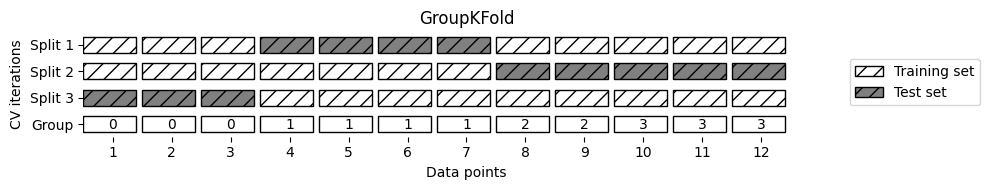

In [36]:
# 그룹별 교차 검증
    # group을 지정 가능하다. - train set과 test set 생성시 분리되지 않아야 할 그룹. 클래스 레이블과는 다르다.
        # 보통 매우 연관된 데이터를 그룹으로 만드는듯

from sklearn.model_selection import GroupKFold
from sklearn.datasets import make_blobs
X,y = make_blobs(n_samples=12, random_state=0)

groups = [0,0,0,1,1,1,1,2,2,3,3,3] # 구지 이렇게 정렬 안해도 됨.
scores = cross_val_score(logreg,X,y,groups=groups,cv=GroupKFold(n_splits=3))
mglearn.plots.plot_group_kfold()
scores

In [38]:
# 반복 교차 검증 - RepeatedKFold, RepeatedStratifiedKFold
    # 데이터의 크기가 크지 않을 경우, 안정된 검증 점수를 위해 교차 검증을 반복하여 여러 번 수행.
    # 반복시 마다 데이터를 다시 섞는다.
    # default values { n_splits : 5, n_repeats : 10}
from sklearn.model_selection import cross_val_score, RepeatedStratifiedKFold
rskfold = RepeatedStratifiedKFold(random_state=42)
scores = cross_val_score(logreg, iris.data, iris.target, cv=rskfold)
scores
    # n_splits * n_repeats 개수만큼 검증 점수가 만들어진다.
scores.mean()

0.9646666666666667

#### 그리드 서치(Grid Search)
+ 관심있는 대상 매개변수들의 가능한 모든 조합을 시도

train set size : 112 , test set size : 38
best_score: 0.9736842105263158
best_param: {'C': 100, 'gamma': 0.01}


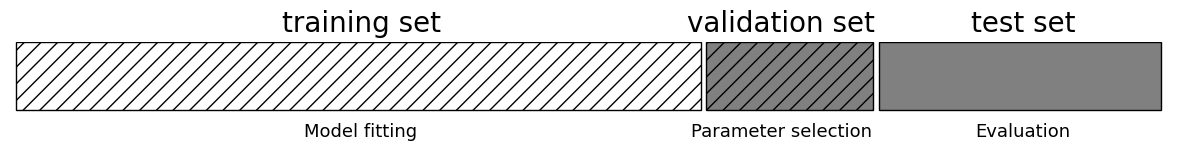

In [44]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, random_state=0)

scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled  = scaler.transform(X_test)

print('train set size : {} , test set size : {}'.format(X_train.shape[0],X_test.shape[0]))

best_score = 0

for gamma in [0.001, 0.01, 0.1, 1, 10, 100]:
    for c in [0.001, 0.01, 0.1, 1, 10, 100]:
        svm = SVC(gamma=gamma,C=c)
        svm.fit(X_train_scaled,y_train)
        score = svm.score(X_test_scaled, y_test)

        if score > best_score:
            best_score = score
            best_param = {'C': c, 'gamma' : gamma}

print('best_score:', best_score)
print('best_param:', best_param)

# but 데이터를 위와 같이 나눠버리면 hp(hyper parameter)선택에 test set을 써버렸기에 일반화를 잘 하는지 확인 불가.
# 따라서 train set, validation set, test set으로 나눈다.
    # validation set을 hp선택에 사용하고, 일반화 성능을 test set으로 확인.
mglearn.plots.plot_threefold_split()

In [85]:
# 위의 코드를 수정
X_tv, X_test, y_tv, y_test = train_test_split(iris.data, iris.target, random_state=0)
X_train, X_val, y_train, y_val = train_test_split(X_tv, y_tv, random_state=1)

from sklearn.preprocessing import Normalizer
scaler = MinMaxScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_tv_scaled = scaler.transform(X_tv)
X_test_scaled  = scaler.transform(X_test)

# 스케일에 따른 score 비교 실험
scaler2 = MinMaxScaler().fit(X_tv)
X_tv_scaled2 = scaler2.transform(X_tv)
X_test_scaled2 = scaler2.transform(X_test)

print('train set size : {}, val set size : {}, test set size : {}'.format(X_train.shape[0],X_val.shape[0],X_test.shape[0]))

best_val_score = 0
for gamma in [0.001, 0.01, 0.1, 1, 10, 100]:
    for c in [0.001, 0.01, 0.1, 1, 10, 100]:
        svm = SVC(gamma=gamma, C=c)
        svm.fit(X_train,y_train)
        score = svm.score(X_val,y_val)
        
        if score > best_val_score:
            best_val_score = score
            best_param = {'gamma' : gamma, 'C' : c}

svm = SVC(**best_param)
svm.fit(X_tv,y_tv)
test_score = svm.score(X_test, y_test)
print('best_val_score :', best_val_score)
print('best_param :', best_param)
print('test_score :', test_score)
    # 왜 스케일링까지 했는데 예제보다 score가 낮은걸까....
    # 노 스케일           > best_val_score : 0.9642857142857143, best_param : {'gamma': 0.001, 'C': 10}, test_score : 0.9210526315789473
    # X_train 기준 minmax > best_val_score : 0.9285714285714286, best_param : {'gamma': 0.001, 'C': 100}, test_score : 0.868421052631579
    # X_tv 기준 minmax    > best_val_score : 0.9285714285714286, best_param : {'gamma': 0.001, 'C': 100}, test_score : 0.868421052631579
    # X_train 기준 normal > best_val_score : 0.9642857142857143, best_param : {'gamma': 0.1, 'C': 100}, test_score : 0.9210526315789473
    # X_tv 기준 normal    > best_val_score : 0.9642857142857143, best_param : {'gamma': 0.1, 'C': 100}, test_score : 0.9210526315789473
    # X_train으로 scale해 쭉 계산한 것과, validation은 train scaled로 test는 val scale로 한 것이 동일한 결과값. > 운인가 or 수학적으로 동일한가..
        # 스케일 결과 normal로 스케일시 데이터 포인트 영향폭은 더 작으면서 더 적은 규제로 모델 완성.(노 스케일에 비해)
        # 아마 예제 데이터라 점수가 같은거 같은데.. 실제로는 scale된 방향이 훨씬 잘 classify 할 수도?

train set size : 84, val set size : 28, test set size : 38
best_val_score : 0.9642857142857143
best_param : {'gamma': 0.001, 'C': 10}
test_score : 0.9210526315789473


In [95]:
# cross_validation을 이용한 grid search
for gamma in [0.001,0.01,0.1,1,10,100]:
    for c in [0.001,0.01,0.1,1,10,100]:
        svm = SVC(gamma=gamma,C=c)
        scores = cross_val_score(svm,X_tv,y_tv)
        score = scores.mean()

        if score> best_score:
            best_score = score
            best_param = {'C':c,'gamma':gamma}
        
svm = SVC(**best_param)
svm.fit(X_tv,y_tv)
print('best_score :', best_score)
print('best_param :', best_param)
    # gamma 6 * c 6 * cv 5 => 180개의 모델 생성

best_score : 0.9736842105263158
best_param : {'gamma': 0.001, 'C': 10}


best val score: 0.9731225296442687
best param: {'C': 10, 'gamma': 0.1}
test score: 0.9736842105263158
best model: SVC(C=10, gamma=0.1)

best param: {'C': 1.7965626423790642, 'kernel': 'linear'}
best val score: 0.9731225296442687


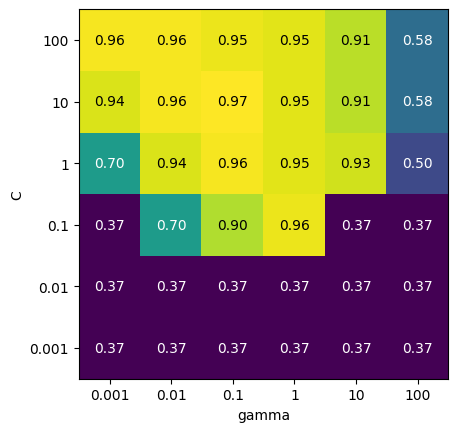

In [111]:
# GridSearchCV - 교차검증 그리드 서치 구현.
    # 먼저 dic 형태로 검색 대상 매개변수를 설정해야한다.
param_grid = {'C':[0.001,0.01,0.1,1,10,100], 'gamma':[0.001,0.01,0.1,1,10,100]}

from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

grid_search = GridSearchCV(SVC(),param_grid,cv=5,return_train_score=True)

X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, random_state=0)

# train_test_split 2번 안써도 되서 편하다! - val set이 겉으로 드러나지 않음.
grid_search.fit(X_train,y_train)                      # 교차 검증 및 그리드 서치
print('best val score:',grid_search.best_score_)      # 교차 검증 최고 점수
print('best param:',grid_search.best_params_)         # 그리드 서치로 선정한 최적 파라미터
print('test score:',grid_search.score(X_test,y_test)) # 선정된 최적 param으로 test score 도출
print('best model:',grid_search.best_estimator_)      # 최종 학습된 모델

# 교차 검증 결과 분석 - cv_results_
pd.set_option('display.max_columns',None)
results = pd.DataFrame(grid_search.cv_results_)
np.transpose(results.head())
    # 만약 다른 매개변수의 조합이 평균 테스트 점수가 같은경우, 테스트 점수의 표준편차가 작은 조합이 더 좋다고 판단.

scores = np.array(results.mean_test_score).reshape(6,-1)
mglearn.tools.heatmap(scores, xlabel='gamma', xticklabels=param_grid['gamma'], yticklabels=param_grid['C'], ylabel='C',cmap='viridis')
    # heatmap 확인으로 알 수 있는것
        # SVC는 hp 선택에 매우 민감하게 반응한다.
        # 다양한 결과를 보일 수 있도록 hp의 범위를 잘 설정했다.
            # 만약 C의 범위가 10~15였으면 다 비슷한 결과가 나왔을 것.
            # 본인이 범위를 적절히 선택했음에도 변화가 없다면, 그 hp자체가 전혀 중요하지 않은 것일 수 있다.

# RandomizedSearchCV
    # 주어진 범위에서 매개변수를 무작위로 선택해 조사. GridSearchCV에 크게 뒤지지 않고, 검색이 빠르다.
    # 매개변수의 조합이 매우 많거나, 연속형 값인 경우 사용한다.
    # n_iter =  로 탐색 횟수를 조정한다.
from sklearn.model_selection import RandomizedSearchCV
from sklearn.utils.fixes import loguniform

param_dist =[{'kernel':['rbf'],'C':loguniform(0.001,100), 'gamma':loguniform(0.001,100)},
             {'kernel':['linear'],'C':loguniform(0.001,100)}]

rand_search = RandomizedSearchCV(SVC(),param_dist,n_iter=20,random_state=42,n_jobs=-1)

rand_search.fit(X_train,y_train)
print('\nbest param:',rand_search.best_params_)
print('best val score:',rand_search.best_score_)
    # 앞의 grid search는 42번의 교차검증을 수행, rand search는 20번만 수행. score는 비슷 > ㄱㅇㄷ

# HarvingGridSearchCV 는 일단 넘어감.

In [107]:
# 비대칭 매개변수 그리드 탐색
    # SVC의 kernel 매개변수는 이에따라 사용되는 다른 매개변수가 바뀐다. 이럴때를 위한 사용법.
    # param_grid를 딕셔너리의 리스트로 만들면 된다.
param_grid = [{'kernel':['rbf'], 'C':[0.001,0.01,0.1,1,10,100], 'gamma':[0.001,0.01,0.1,1,10,100]},
              {'kernel':['linear'], 'C':[0.001,0.01,0.1,1,10,100]}] # linear는 gamma를 사용하지 않는다. 커널폭 조절X
grid_search = GridSearchCV(SVC(),param_grid,cv=5,return_train_score=True)
grid_search.fit(X_train,y_train)
print('best_param:',grid_search.best_params_)
print('best val score:', grid_search.best_score_)

results = pd.DataFrame(grid_search.cv_results_)
results.T
    # kernel = linear일때는 C만 바뀌는 것을 볼 수 있음

# 다양한 교차 검증 적용. 
    # GridSearchCV는 분류에 Stratified cross kFold, 회귀에 cross KFold를 사용한다.
    # 이를 cv= 매개변수를 통해 다른 교차 검증 분할기를 사용할 수 있다.

best_param: {'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}
best val score: 0.9731225296442687


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41
mean_fit_time,0.0004,0.0006,0.0004,0.0006,0.0004,0.0004,0.0004,0.0004,0.0002,0.0004,0.0004,0.0006,0.0006,0.0004,0.0004,0.0004,0.0004,0.0008,0.0006,0.0002,0.0,0.0006,0.0006,0.0008,0.0,0.0,0.0004,0.0004,0.0004,0.0006,0.0004,0.0004,0.0002,0.0,0.000691,0.0004,0.0,0.0004,0.0002,0.0002,0.0004,0.0002
std_fit_time,0.00049,0.00049,0.00049,0.00049,0.00049,0.00049,0.00049,0.00049,0.0004,0.00049,0.00049,0.00049,0.00049,0.00049,0.00049,0.00049,0.00049,0.0004,0.00049,0.0004,0.0,0.00049,0.00049,0.0004,0.0,0.0,0.00049,0.00049,0.00049,0.00049,0.00049,0.00049,0.0004,0.0,0.000598,0.00049,0.0,0.00049,0.0004,0.0004,0.00049,0.0004
mean_score_time,0.0006,0.0004,0.0004,0.0,0.0004,0.0004,0.0004,0.0002,0.0004,0.0002,0.0004,0.0002,0.0002,0.0002,0.0002,0.0002,0.0002,0.0002,0.0002,0.0,0.0,0.0,0.0,0.0002,0.0002,0.0004,0.0,0.0,0.0002,0.0004,0.0004,0.0,0.0002,0.00051,0.000202,0.0004,0.0002,0.0002,0.0002,0.0,0.0002,0.0
std_score_time,0.00049,0.00049,0.00049,0.0,0.00049,0.00049,0.00049,0.0004,0.00049,0.0004,0.00049,0.0004,0.0004,0.0004,0.0004,0.0004,0.0004,0.0004,0.0004,0.0,0.0,0.0,0.0,0.0004,0.0004,0.00049,0.0,0.0,0.0004,0.00049,0.00049,0.0,0.0004,0.000448,0.000403,0.00049,0.0004,0.0004,0.0004,0.0,0.0004,0.0
param_C,0.001,0.001,0.001,0.001,0.001,0.001,0.01,0.01,0.01,0.01,0.01,0.01,0.1,0.1,0.1,0.1,0.1,0.1,1,1,1,1,1,1,10,10,10,10,10,10,100,100,100,100,100,100,0.001,0.01,0.1,1,10,100
param_gamma,0.001,0.01,0.1,1,10,100,0.001,0.01,0.1,1,10,100,0.001,0.01,0.1,1,10,100,0.001,0.01,0.1,1,10,100,0.001,0.01,0.1,1,10,100,0.001,0.01,0.1,1,10,100,NaN,NaN,NaN,NaN,NaN,NaN
param_kernel,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,linear,linear,linear,linear,linear,linear
params,"{'C': 0.001, 'gamma': 0.001, 'kernel': 'rbf'}","{'C': 0.001, 'gamma': 0.01, 'kernel': 'rbf'}","{'C': 0.001, 'gamma': 0.1, 'kernel': 'rbf'}","{'C': 0.001, 'gamma': 1, 'kernel': 'rbf'}","{'C': 0.001, 'gamma': 10, 'kernel': 'rbf'}","{'C': 0.001, 'gamma': 100, 'kernel': 'rbf'}","{'C': 0.01, 'gamma': 0.001, 'kernel': 'rbf'}","{'C': 0.01, 'gamma': 0.01, 'kernel': 'rbf'}","{'C': 0.01, 'gamma': 0.1, 'kernel': 'rbf'}","{'C': 0.01, 'gamma': 1, 'kernel': 'rbf'}","{'C': 0.01, 'gamma': 10, 'kernel': 'rbf'}","{'C': 0.01, 'gamma': 100, 'kernel': 'rbf'}","{'C': 0.1, 'gamma': 0.001, 'kernel': 'rbf'}","{'C': 0.1, 'gamma': 0.01, 'kernel': 'rbf'}","{'C': 0.1, 'gamma': 0.1, 'kernel': 'rbf'}","{'C': 0.1, 'gamma': 1, 'kernel': 'rbf'}","{'C': 0.1, 'gamma': 10, 'kernel': 'rbf'}","{'C': 0.1, 'gamma': 100, 'kernel': 'rbf'}","{'C': 1, 'gamma': 0.001, 'kernel': 'rbf'}","{'C': 1, 'gamma': 0.01, 'kernel': 'rbf'}","{'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}","{'C': 1, 'gamma': 1, 'kernel': 'rbf'}","{'C': 1, 'gamma': 10, 'kernel': 'rbf'}","{'C': 1, 'gamma': 100, 'kernel': 'rbf'}","{'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}","{'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}","{'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}","{'C': 10, 'gamma': 1, 'kernel': 'rbf'}","{'C': 10, 'gamma': 10, 'kernel': 'rbf'}","{'C': 10, 'gamma': 100, 'kernel': 'rbf'}","{'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}","{'C': 100, 'gamma': 0.01, 'kernel': 'rbf'}","{'C': 100, 'gamma': 0.1, 'kernel': 'rbf'}","{'C': 100, 'gamma': 1, 'kernel': 'rbf'}","{'C': 100, 'gamma': 10, 'kernel': 'rbf'}","{'C': 100, 'gamma': 100, 'kernel': 'rbf'}","{'C': 0.001, 'kernel': 'linear'}","{'C': 0.01, 'kernel': 'linear'}","{'C': 0.1, 'kernel': 'linear'}","{'C': 1, 'kernel': 'linear'}","{'C': 10, 'kernel': 'linear'}","{'C': 100, 'kernel': 'linear'}"
split0_test_score,0.347826,0.347826,0.347826,0.347826,0.347826,0.347826,0.347826,0.347826,0.347826,0.347826,0.347826,0.347826,0.347826,0.695652,0.913043,1.0,0.347826,0.347826,0.695652,0.913043,1.0,0.956522,0.913043,0.391304,0.913043,1.0,1.0,0.956522,0.869565,0.521739,1.0,1.0,1.0,0.956522,0.869565,0.521739,0.347826,0.869565,1.0,1.0,1.0,0.95652

In [109]:
# 중첩 교차 검증
    # GridSearchCV는 데이터를 훈련,테스트로 한 번만 나누기 때문에 결과가 불안정하고 테스트 데이터의 분할에 크게 의존한다.
    # 이를 완화? 하기위해 교차 검증 분할 방식을 사용.
    # 바깥쪽 루프에서 데이터를 훈련, 테스트로 나눈다. > 각 훈련 세트에 대해 그리드서치를 진행한다. 
    # > 바깥쪽에서 분할된 테스트 세트의 점수를 최적의 매개변수 설정을 사용해 각각 측정한다.

    # 테스트 점수의 목록을 반환.
    # 최적 매개변수가 모델을 얼마나 잘 일반화 시키는지. 예측모델을 찾는데는 안쓰이고 일반화 성능 평가에 유용.
param_grid = {'C':[0.001,0.01,0.1,1,10,100], 'gamma':[0.001,0.01,0.1,1,10,100]}
scores = cross_val_score(GridSearchCV(SVC(),param_grid,cv=5), iris.data, iris.target)
print('cross val score:',scores)
print('cross val mean score:', scores.mean())
    # == SVC는 iris dataset에서 평균 교차 검증 정확도가 98% 이다.
    # 6 * 6   *     5    *  5   = 900 코스트가 상당히 비쌈;
    # 매개변수 * 안쪽루트 * 바깥쪽 루트

cross val score: [0.96666667 1.         0.96666667 0.96666667 1.        ]
cross val mean score: 0.9800000000000001


#### 평가 지표와 측정
+ 지금까지는 성능 평가에 분류:acc,회귀:R^2 를 사용했다. 이외에도 성능 측정 방법은 많다.
    > 실전에서는 애플리케이션에 따라 적합하지 않을 수 있다.

+ 평가 지표 선택시에는 ml 애플리케이션의 최종 목표를 기억해야 한다.
    > 그 목표에 따라 선택되는 알고리즘이 다를 것
    
    > 비즈니스 임팩트 : 특정 알고리즘을 선택함으로써 나타난 결과 

+ 이진 분류 평가 지표, 다중 분류 평가 지표, 회귀 평가 지표, 모델 선택에서 평가 지표 등

##### 이진 분류 평가 지표
+ Error
    > Type 1 error : 거짓 양성. FP = 음성이지만 양성으로 판단

    > Type 2 error : 거짓 음성. FP = 양성이지만 음성으로 판단

    > 두 종류의 에러는 두 클래스 중 하나가 다른 것보다 훨씬 많을 때 더욱 중요 = 불균형 데이터셋

        > 실제로 데이터는 대부분 불균형 데이터 이기에 무조건 한 클래스로 찍는 모델이 학습이 잘된 모델보다 정확도가 높을수도 있다.
        

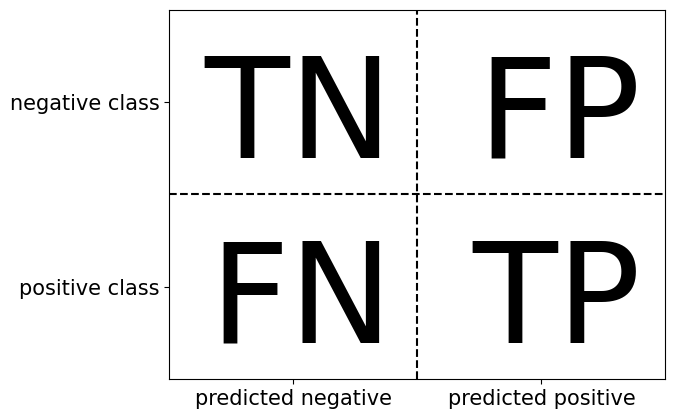

In [112]:
# 오차 행렬
mglearn.plots.plot_binary_confusion_matrix()

    # 정확도 = (TP + TN)/(TP + TN + FP + FN) = 정확히 예측한 수를 전체 샘플 수로 나눈다

    # 정밀도 = TP/(TP+FP) 
    #        = 양성으로 예측된 것 중 진짜 양성인것 = 거짓양성을 줄이는 것이 목표일때 사용 = PPV

    # 재현율 = TP/(TP+FN) 
    #        = 전체 양성 샘플 중 얼마나 많은 샘플이 양성으로 분류되는지 = 모든 양성 샘플을 식별해야 할 때 사용 = TPR

# 이 외에도 많은 지표들이 있으나, ML 이진 분류는 보통 정밀도와 재현율을 가장 많이 사용한다.

    # f_1-score : 정밀도와 재현율의 조화 평균. 둘을 하나로 요약한 값
    #         = F_1 = 2(PPV*TPR)/(PPV+TPR)
        # 사실 원래 F-score는 ((b^2+1)*PR)/(b^2*P + R), b = (1-a)/a 이다.
        #   즉, f_1-score는 b=1, a=0.5 인 상태의 f점수를 의미.
        #   b > 1 이면 재현율이 강조되고, b < 1이면 정밀도가 강조된다.

              precision    recall  f1-score   support

           0       0.94      0.88      0.91       104
           1       0.20      0.33      0.25         9

    accuracy                           0.84       113
   macro avg       0.57      0.61      0.58       113
weighted avg       0.88      0.84      0.86       113



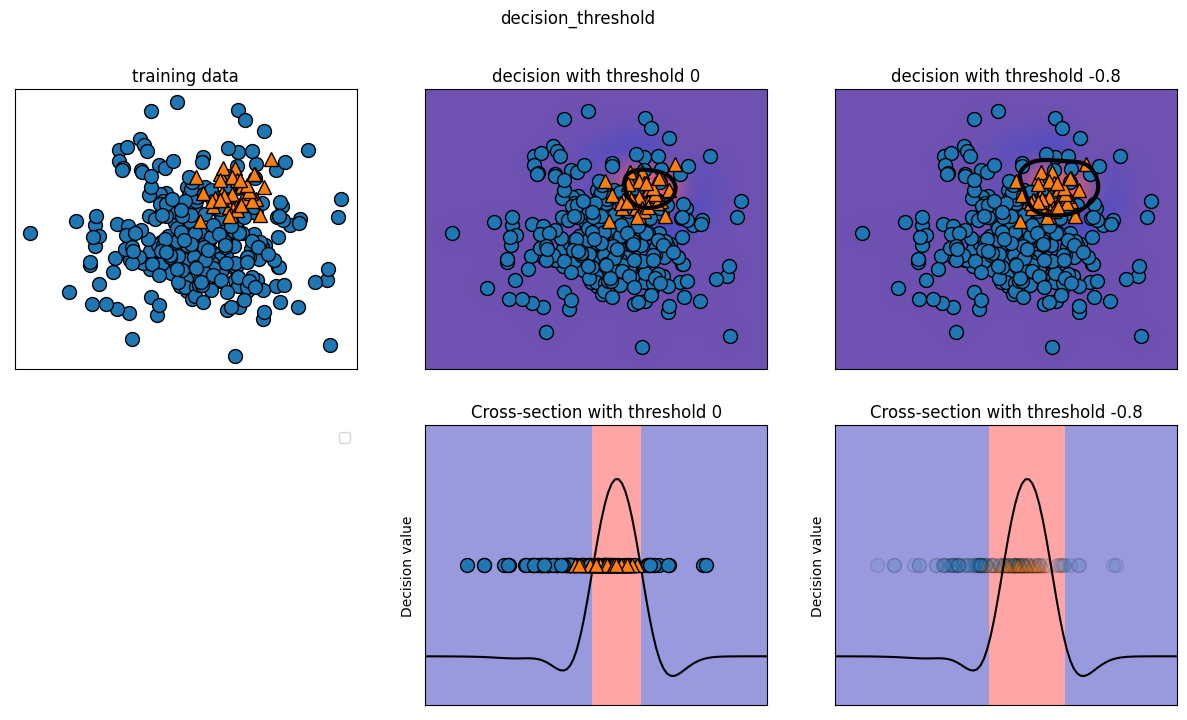

In [18]:
# 불확실성 고려
    # 예측의 확신을 가늠하기 위해 대부분의 분류기는 decision_function / predict_proba 를 제공.
    # 이진 탐색에서 decision_function은 0, predict_proba는 0.5를 임계값으로 사용.

    # 음성 클래스 데이터 포인트 400개와 양성 50개로 이루어진 불균형 이진 분류 데이터
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=(400,50),cluster_std=[7.0,2],random_state=22)
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=0)

from sklearn.svm import SVC
svc = SVC(gamma=0.5).fit(X_train, y_train)

mglearn.plots.plot_decision_threshold()

from sklearn.metrics import classification_report
print(classification_report(y_test, svc.predict(X_test)))
    # 클래스 1에 대한 상당히 작은 정밀도, 재현율도 낮다. 클래스 0이 매우 많아 분류기가 클래스 0에 초점을 맞추고 있다.

In [19]:
    # 클래스 1의 재현율을 높이는 것이 중요한 상황
        # = FP를 늘리더라도 FN을 줄인다, TP를 늘린다.
        # 기본적으로 임계값 0보다 큰 포인트는 클래스 1로 분류된다. > 더 많은 포인트의 분류를 위해 임계값을 낮춘다.
y_pred_lower_threshold = svc.decision_function(X_test) > -.8
print(classification_report(y_test,y_pred_lower_threshold))
    # 정확도가 내려가고, 재현율이 상당히 올라감

# predict_proba의 출력은 0~1사이로 고정이니 임계값 선택이 더 쉽다.
# 기본값 0.5 이상이면 양성, 이하면 음성으로 판단하며 양성 클래스라는 확신이 50% 이상일때 양성으로 분류된다.
    # 하지만 모든 모델이 쓸모 있는 불확실성을 제공하는건 아니다.
        # max_depth의 decisiontree는 잘못된 것이라도 100% 확신한다.
        # 이는 보정(calibration) 개념과 관련있다.
            # 보정된 모델 = 불확실성을 정확하게 측정하는 모델.

              precision    recall  f1-score   support

           0       1.00      0.81      0.89       104
           1       0.31      1.00      0.47         9

    accuracy                           0.82       113
   macro avg       0.66      0.90      0.68       113
weighted avg       0.95      0.82      0.86       113



rf f1_score: 0.6097560975609757
svc f1_score: 0.6558704453441295


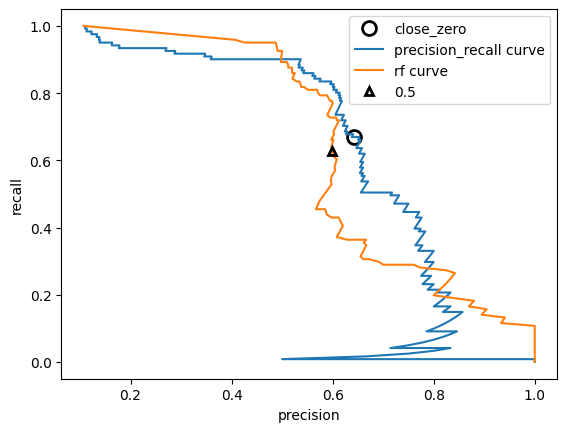

In [32]:
# 정밀도-재현율 곡선과 ROC 곡선
    # 모델의 임계값은 해당 분류기의 정밀도와 재현율의 상충 관계 조절에 관련된 것.
    # 원하는 임계값(운영 포인트)을 유지하며 적절한 정밀도를 유지하는 모델을 만들어야 한다.
    # 새로운 모델 생성시에는 운영 포인트가 명확하지 않은 상황이 많다.
        # > 한 번에 정밀도/재현율의 모든 장단점, 임계값의 조사가 필요. = 정밀도-재현율 곡선
X,y = make_blobs(n_samples=(4000,500),cluster_std=[7.0,2],random_state=22)
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=0)

svc=SVC(gamma=0.05).fit(X_train, y_train)

from sklearn.metrics import precision_recall_curve
precision, recall, thresholds = precision_recall_curve(y_test, svc.decision_function(X_test))

    # 0에 가까운 임계값 찾기 = predict 메서드 사용시 쓰이는 임계값
close_zero = np.argmin(np.abs(thresholds))
plt.plot(precision[close_zero],recall[close_zero],'o',markersize=10, label='close_zero',c='k',mew=2,fillstyle='none')
plt.plot(precision,recall,label='precision_recall curve')
plt.xlabel('precision'); plt.ylabel('recall')
    # 딱봐도 곡선이 우측 상단으로 갈수록 좋은 분류기. = 분류기가 다르면 곡선의 다른 부분에서 장점이 생긴다(운영 포인트가 달라진다.)

from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, random_state=0, max_features=2)
rf.fit(X_train, y_train)

precision_rf ,recall_rf, thresholds_rf = precision_recall_curve(y_test, rf.predict_proba(X_test)[:,1])
    # precision_recall curve는 양성 클래스 확신 측정값을 두번째 매개변수로 받는다. == predict_proba결과의 [:,1] (두 번째 값)

close_zero_rf = np.argmin(np.abs(thresholds_rf-0.5)) # -0.5는 왜인지 모르겠음;

plt.plot(precision_rf,recall_rf,label='rf curve')
plt.plot(precision_rf[close_zero_rf],recall_rf[close_zero_rf],'^',c='k',fillstyle='none',mew=2, label='0.5')
plt.legend(loc='best')
    # 정밀도 혹은 재현율의 극한에서는 rf가 더 좋지만, 일반적인 상황에서는 svc가 더 좋음을 확인가능.
    # f_1-score은 기본 임계값에서의 점수이므로 이런 세세한 부분을 놓칠 수 있다.

from sklearn.metrics import f1_score
print('rf f1_score:', f1_score(y_test,rf.predict(X_test)))
print('svc f1_score:', f1_score(y_test, svc.predict(X_test)))

# 위의 작업은 너무 수작업이다.. 자동으로 비교하려면 전체 곡선의 정보를 요약해야한다.
    # 곡선 아랫부분의 면적을 계산 = 평균 정밀도
from sklearn.metrics import average_precision_score
ap_rf = average_precision_score(y_test, rf.predict_proba(X_test)[:,1])
ap_svc = average_precision_score(y_test, svc.decision_function(X_test))
print('ap_rf :',ap_rf,'\nap_svc:', ap_svc)

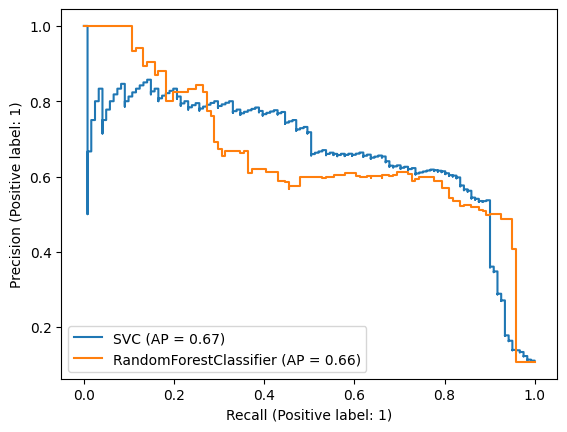

In [36]:
# PrecisionRecallDisplay - precision_recall curve 자동 생성
from sklearn.metrics import PrecisionRecallDisplay

fig, ax = plt.subplots()
PrecisionRecallDisplay.from_estimator(svc,X_test,y_test,ax=ax)
PrecisionRecallDisplay.from_estimator(rf, X_test,y_test,ax=ax)

SVC's AUC: 0.9162935036712654


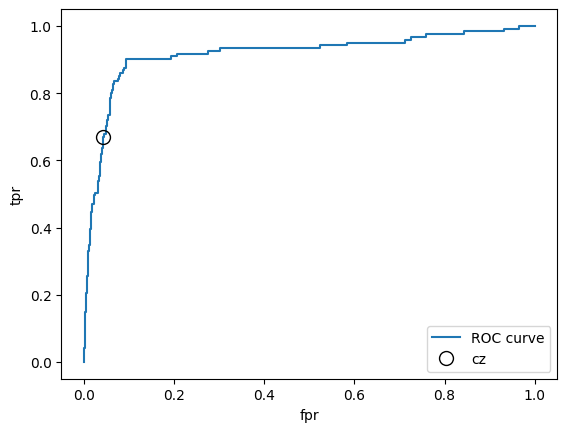

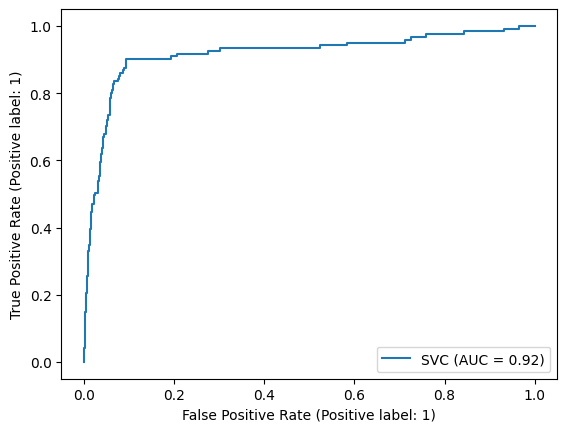

In [40]:
# ROC와 AUC

# ROC curve : 여러 임계값에서 분류기의 특성을 분석하는 도구
    # 정밀도와 재현율 대신 TPR(= TP/(TP+FN))과 FPR(= FP/(FP+TN))을 사용.
    #                    진짜 양성 비율        거짓 양성 비율

from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, svc.decision_function(X_test))

plt.plot(fpr, tpr, label='ROC curve')
plt.xlabel('fpr'); plt.ylabel('tpr')
cz = np.argmin(np.abs(thresholds))
plt.plot(fpr[cz],tpr[cz],'o',markersize=10,label='cz',fillstyle='none',c='k')
plt.legend(loc='best')
    # ROC curve는 왼쪽 위에 가까울수록 이상적이다.
    # precison_recall curve 처럼 곡선 아래 면적 값으로 요약 가능하다. == AUC.
from sklearn.metrics import roc_auc_score
svc_auc = roc_auc_score(y_test, svc.decision_function(X_test))
print('SVC\'s AUC:', svc_auc)

# 데이터 셋에 담긴 클래스가 아무리 불균형해도, 무작위 예측 AUC 값은 0.5가 된다.
    # = 불균형 데이터셋에서는 정확도보다 AUC가 훨씬 좋은 지표.

from sklearn.metrics import RocCurveDisplay
fig, ax = plt.subplots()
RocCurveDisplay.from_estimator(svc, X_test, y_test, ax=ax)

##### 다중 분류의 평가 지표 
+ 다중 분류 평가 지표는 모두 이진 분류 평가 지표에서 유도된 것.

    > 다만 모든 클래스에 대해 평균을 낼 뿐이다.

    > 정확히 분류된 샘플의 비율로 정확도를 정의한다. = 클래스 불균형시 좋지 않은 결과

accuracy: 0.9533333333333334
error matrix: [[37  0  0  0  0  0  0  0  0  0]
 [ 0 40  0  0  0  0  0  0  2  1]
 [ 0  0 41  3  0  0  0  0  0  0]
 [ 0  0  0 44  0  0  0  0  1  0]
 [ 0  0  0  0 37  0  0  1  0  0]
 [ 0  0  0  0  0 46  0  0  0  2]
 [ 0  1  0  0  0  0 51  0  0  0]
 [ 0  0  0  1  1  0  0 46  0  0]
 [ 0  3  1  0  0  0  1  0 43  0]
 [ 0  0  0  0  0  1  0  0  2 44]]


c:\Users\rjsgh\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


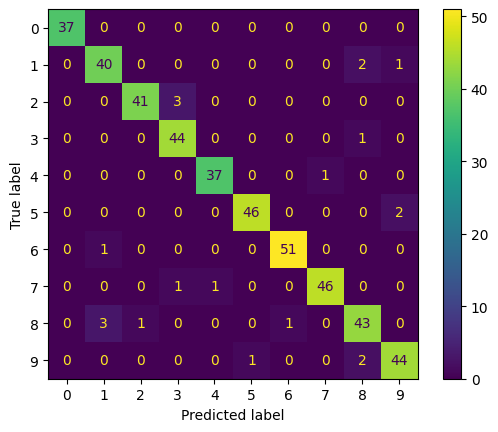

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        37
           1       0.91      0.93      0.92        43
           2       0.98      0.93      0.95        44
           3       0.92      0.98      0.95        45
           4       0.97      0.97      0.97        38
           5       0.98      0.96      0.97        48
           6       0.98      0.98      0.98        52
           7       0.98      0.96      0.97        48
           8       0.90      0.90      0.90        48
           9       0.94      0.94      0.94        47

    accuracy                           0.95       450
   macro avg       0.95      0.95      0.95       450
weighted avg       0.95      0.95      0.95       450



In [50]:
from sklearn.datasets import load_digits
digits= load_digits()
from sklearn.metrics import accuracy_score
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, random_state=0)

from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(max_iter=5000).fit(X_train, y_train)
pred = lr.predict(X_test)

from sklearn.metrics import confusion_matrix
print('accuracy:',accuracy_score(y_test, pred))
print('error matrix:',confusion_matrix(y_test, pred))

from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(lr,X_test, y_test)
plt.show()

from sklearn.metrics import classification_report
print(classification_report(y_test,pred))

In [51]:
# 다중 클래스용 f1_score
    # 다중 분류에서 불균형 데이터셋을 위해 가장 널리 사용하는 평가 지표.
    # 클래스마다 f1_score를 계산 후 평균을 낸다.
        # macro : 점수별 가중치 없음, weighted : 샘플 수로 가중치 부여, micro : FP, FN, TP를 모두 해아린 후 계산
        # average의 default는 binary로 이진분류가 기본 설정이다.
from sklearn.metrics import f1_score
print('micro average f1 score:', f1_score(y_test, pred, average='micro'))
print('macro average f1 score:', f1_score(y_test, pred, average='macro'))

micro average f1 score: 0.9533333333333334
macro average f1 score: 0.9542564253775861


##### 회귀의 평가 지표
+ 회귀의 경우는 score 메서드의 R^2 값으로도 충분하다. 

##### 모델 선택에서의 평가 지표 사용
+ scoring 매개변수를 이용한다.

In [62]:
# 분류의 기본 평가지표 = 정확도
from sklearn.model_selection import cross_val_score
print('default:', cross_val_score(SVC(),digits.data, digits.target ==9, cv=5))

explicit_acc = cross_val_score(SVC(), digits.data, digits.target == 9, scoring='accuracy', cv=5)
print('accuracy:', explicit_acc)

roc_auc = cross_val_score(SVC(),digits.data, digits.target == 9, scoring='roc_auc',cv=5)
print('average auc:', roc_auc)

from sklearn.model_selection import cross_validate

res = cross_validate(SVC(), digits.data, digits.target == 9,
                     scoring=["accuracy", "average_precision", "recall_macro"],
                     return_train_score=True, cv=5)
pd.DataFrame(res)

    # GridSearchCV 에서도 scoring으로 여러 측정 지표 지정 가능
X_train, X_test, y_train, y_test = train_test_split(
    digits.data, digits.target == 9, random_state=0)

param_grid = {'gamma': [0.0001, 0.01, 0.1, 1, 10]}

    # 기본 정확도 측정 지표를 사용
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(SVC(), param_grid=param_grid)
grid.fit(X_train, y_train)
print("\nacc grid search")
print("best_pram:", grid.best_params_)
print("best val score (pre)): {:.3f}".format(grid.best_score_))
print("test set average pre : {:.3f}".format(
      average_precision_score(y_test, grid.decision_function(X_test))))
print("test set acc: {:.3f}".format(
      # grid.score 점수와 동일
      accuracy_score(y_test, grid.predict(X_test))))

    # 평균 정밀도 지표 사용
grid = GridSearchCV(SVC(), param_grid=param_grid, scoring="average_precision")
grid.fit(X_train, y_train)
print("\naverage acc grid search")
print("best pram:", grid.best_params_)
print("best val score (pre): {:.3f}".format(grid.best_score_))
print("test set average pre: {:.3f}".format(
      # grid.score 점수와 동일
      average_precision_score(y_test, grid.decision_function(X_test))))
print("test set acc: {:.3f}".format(
      accuracy_score(y_test, grid.predict(X_test))))

default: [0.975      0.99166667 1.         0.99442897 0.98050139]
accuracy: [0.975      0.99166667 1.         0.99442897 0.98050139]
average auc: [0.99717078 0.99854252 1.         0.999828   0.98400413]

acc grid search
best_pram: {'gamma': 0.0001}
best val score (pre)): 0.976
test set average pre : 0.966
test set acc: 0.973

average acc grid search
best pram: {'gamma': 0.01}
best val score (pre): 0.988
test set average pre: 0.996
test set acc: 0.896
